In [1]:
import glob
import os
import matplotlib.pyplot as plt
from PIL import Image 
import xml.etree.ElementTree as ET
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split
import shutil

In [3]:
dog_images = glob.glob('C:\\Users\\kjosh\\OneDrive\\Documents\\UChicago\\ADSP 31009 - Machine Learning & Predictive Analytics\\Final Project\\Images\\*\\*')
breeds = glob.glob('C:\\Users\\kjosh\\OneDrive\\Documents\\UChicago\\ADSP 31009 - Machine Learning & Predictive Analytics\\Final Project\\Annotation\\*')
annotations = glob.glob('C:\\Users\\kjosh\\OneDrive\\Documents\\UChicago\\ADSP 31009 - Machine Learning & Predictive Analytics\\Final Project\\Annotation\\*\\*')

In [4]:
img_size = 224

In [5]:
input_shape = (img_size,img_size,3)

In [7]:
# Read X and Y Coordinates from the annotations file 
def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
    return bbox

In [8]:
# Get the image path from the annoation path
def get_image(annot):
    img_path = 'C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Images/'
    file = annot.split('\\')
    img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
    return img_filename

In [31]:
print(f'Number of Images: {len(dog_images)}')

Number of Images: 20580


In [33]:
print(f'Number of Dog Breeds: {len(breeds)}')

Number of Dog Breeds: 120


In [12]:
print(f'Number of Annotations: {len(annotations)}')

Number of Annotations: 20580


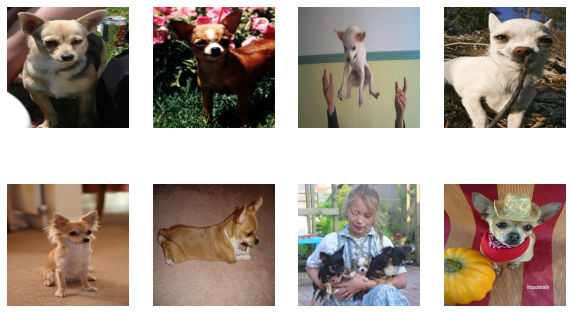

In [17]:
plt.figure(figsize=(10,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.axis("off")
    dog = get_image(annotations[i])
    im = Image.open(dog)
    im = im.resize((256,256), Image.ANTIALIAS)
    plt.imshow(im)

In [22]:
plt.figure(figsize=(10,6))
for i in range(len(dog_images)):
    bbox = get_bounding_boxes(annotations[i])
    dog = get_image(annotations[i])
    im = Image.open(dog)
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((331,331), Image.ANTIALIAS)
        new_path = dog.replace('/Images/','/Cropped_Images/')
        new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
        im2=im2.convert('RGB')
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)

<Figure size 720x432 with 0 Axes>

The above code will extract the bounding box information for each of the images in the dataset and crop the image to only include the dog. In cases where there are multiple dogs in the picture, multiple cropped images will be created equivalent to the number of dogs. An example is shown below.

In [11]:
mult_example_image = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Images/n02085620-Chihuahua/n02085620_473.jpg"

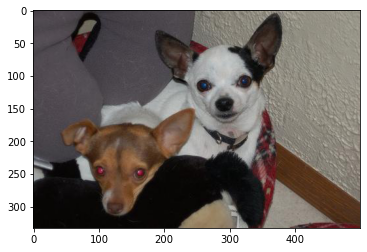

In [12]:
img = Image.open(mult_example_image)
plt.imshow(img)

In [17]:
# The above image of two dogs is split into two separate images for the purposes of training the model appropriately.

In [13]:
split_dog1 = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Cropped_Images/n02085620-Chihuahua/n02085620_473-0.jpg"

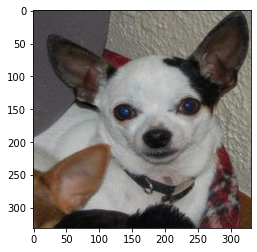

In [15]:
img = Image.open(split_dog1)
plt.imshow(img)

In [9]:
split_dog2 = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Cropped_Images/n02085620-Chihuahua/n02085620_473-1.jpg"

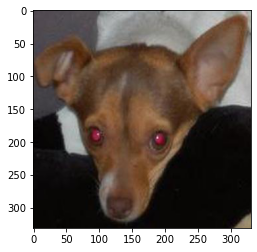

In [16]:
img = Image.open(split_dog2)
plt.imshow(img)

In [70]:
dataset_path = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Cropped_Images/"

In [28]:
file_count = glob.glob("C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Cropped_Images/*/*")

In [32]:
print(f'Total Number of Dog Images: {len(file_count)}')

Total Number of Dog Images: 22126


There are 22,126 dogs across the 20,580 images in the dataset. This is because certain images have multiple dogs.

In [36]:
dog_breeds = os.listdir(dataset_path)

In [45]:
breed_names = []

In [46]:
# All the dog breeds in the dataset are as follows
for breed in dog_breeds:
    breed_name = breed.split('-')[1]
    breed_names.append(breed_name)
    print(breed_name)

Chihuahua
Japanese_spaniel
Maltese_dog
Pekinese
Shih
Blenheim_spaniel
papillon
toy_terrier
Rhodesian_ridgeback
Afghan_hound
basset
beagle
bloodhound
bluetick
black
Walker_hound
English_foxhound
redbone
borzoi
Irish_wolfhound
Italian_greyhound
whippet
Ibizan_hound
Norwegian_elkhound
otterhound
Saluki
Scottish_deerhound
Weimaraner
Staffordshire_bullterrier
American_Staffordshire_terrier
Bedlington_terrier
Border_terrier
Kerry_blue_terrier
Irish_terrier
Norfolk_terrier
Norwich_terrier
Yorkshire_terrier
wire
Lakeland_terrier
Sealyham_terrier
Airedale
cairn
Australian_terrier
Dandie_Dinmont
Boston_bull
miniature_schnauzer
giant_schnauzer
standard_schnauzer
Scotch_terrier
Tibetan_terrier
silky_terrier
soft
West_Highland_white_terrier
Lhasa
flat
curly
golden_retriever
Labrador_retriever
Chesapeake_Bay_retriever
German_short
vizsla
English_setter
Irish_setter
Gordon_setter
Brittany_spaniel
clumber
English_springer
Welsh_springer_spaniel
cocker_spaniel
Sussex_spaniel
Irish_water_spaniel
kuvasz


In [41]:
# A dictionary which contains class and number of images in that class
counts = {}
for d in dog_breeds:
    counts[d] = len(os.listdir(os.path.join(dataset_path, d)))

In [42]:
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

Total number of images in dataset: 22126


In [55]:
breed_counts = list(counts.values())

The following bar charts display the number of images per dog breed/class.

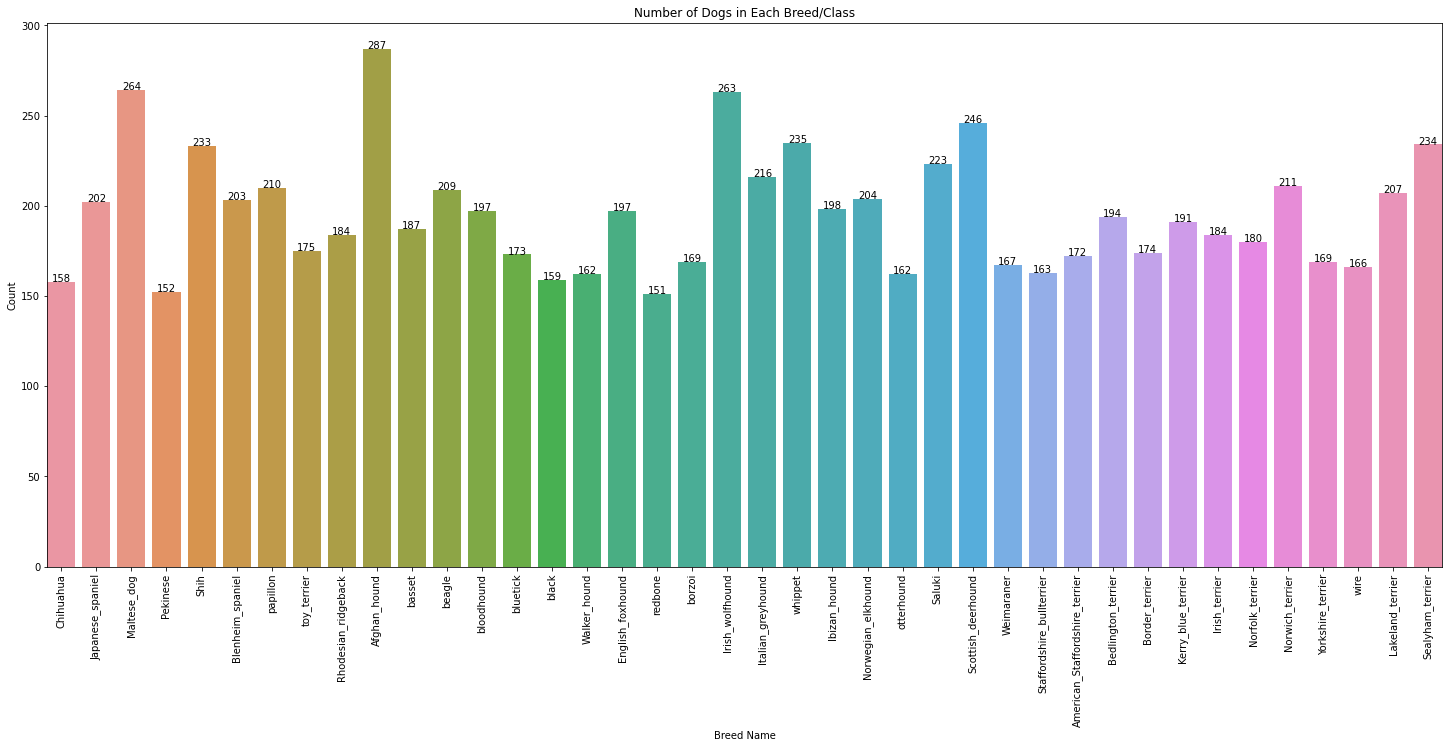

In [56]:
fig = plt.figure(figsize = (25, 10))
ax = sns.barplot(x = breed_names[:40], y = breed_counts[:40])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, breed_counts[i], ha="center")
plt.title('Number of Dogs in Each Breed/Class')
plt.xlabel('Breed Name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

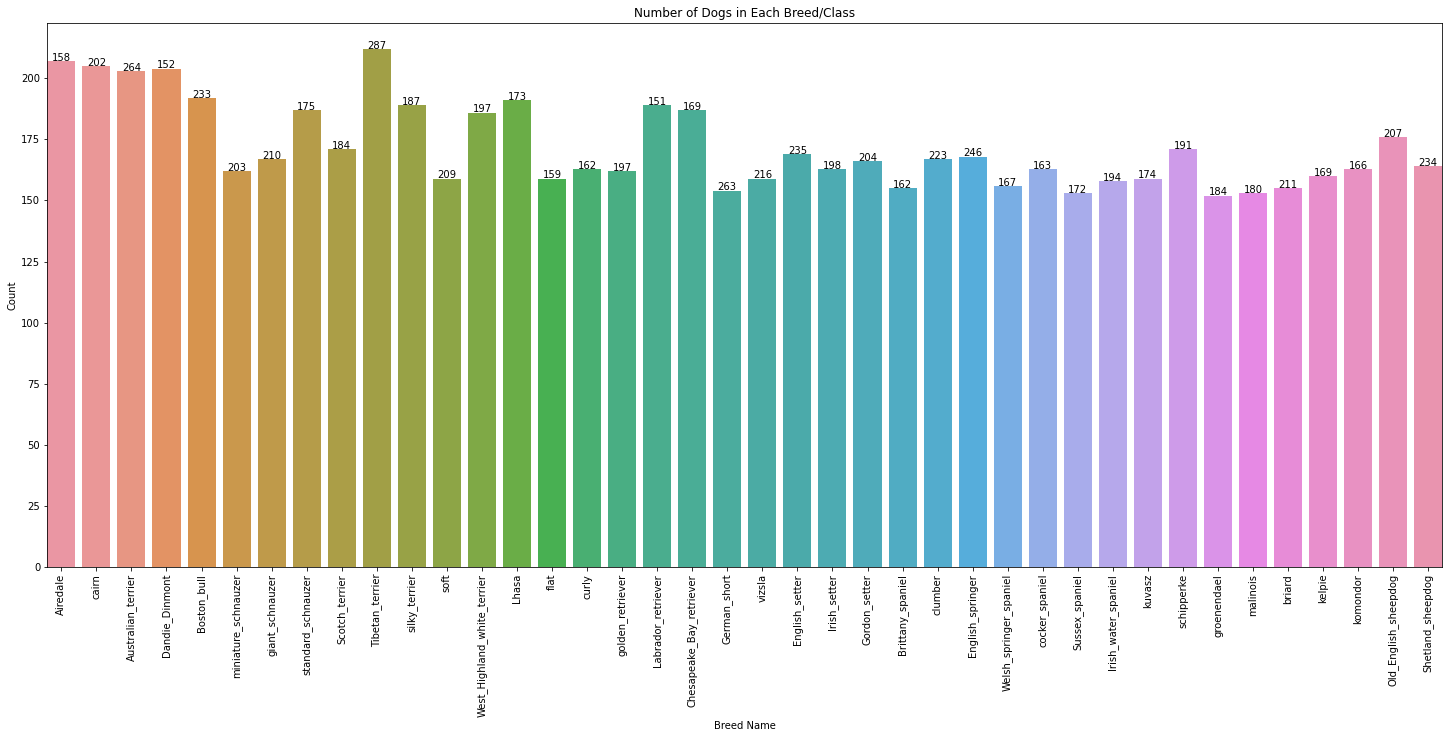

In [57]:
fig = plt.figure(figsize = (25, 10))
ax = sns.barplot(x = breed_names[40:80], y = breed_counts[40:80])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, breed_counts[i], ha="center")
plt.title('Number of Dogs in Each Breed/Class')
plt.xlabel('Breed Name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

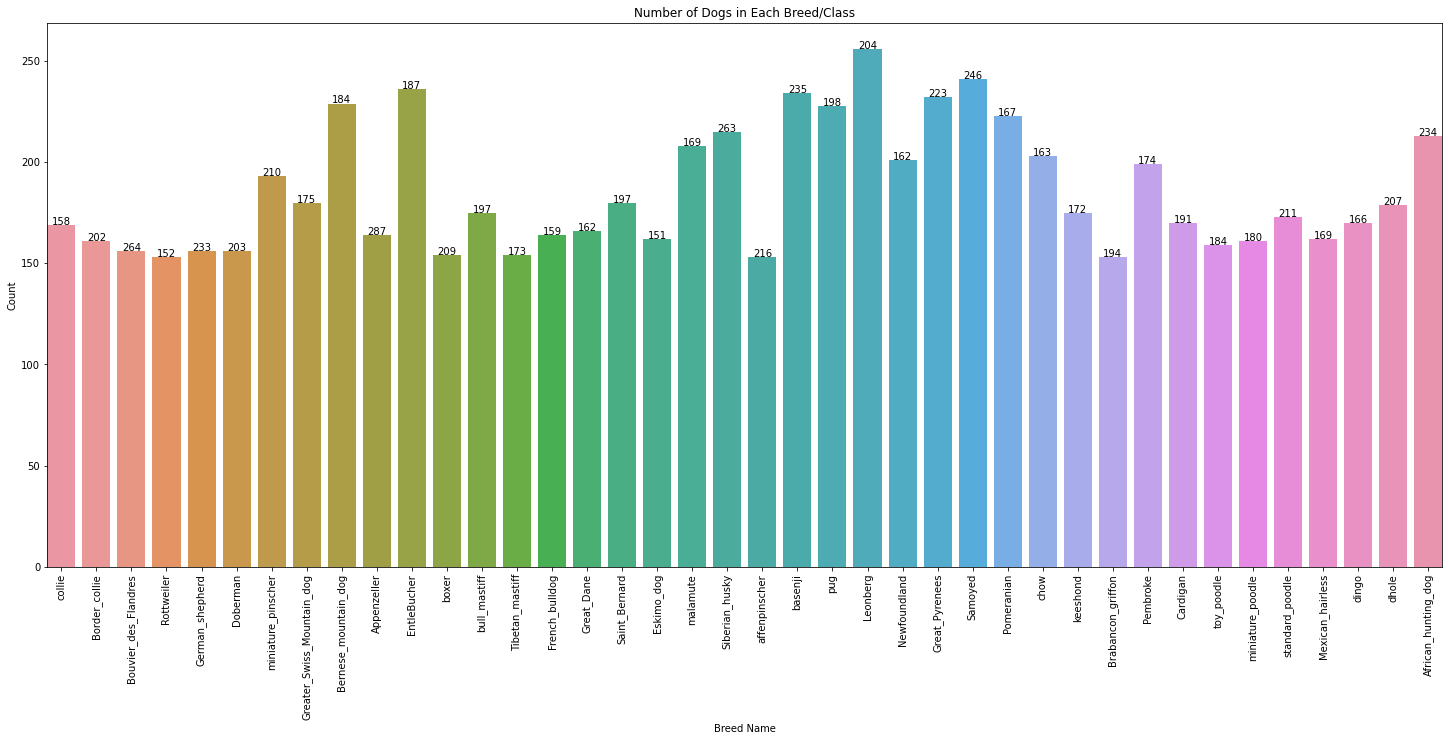

In [58]:
fig = plt.figure(figsize = (25, 10))
ax = sns.barplot(x = breed_names[80:], y = breed_counts[80:])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, breed_counts[i], ha="center")
plt.title('Number of Dogs in Each Breed/Class')
plt.xlabel('Breed Name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [62]:
output_path = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Train_Test_Split/" 

Split images data into training and testing dataset.

In [86]:
for breed in dog_breeds:
    breed_path = os.path.join(dataset_path, breed)
    images = os.listdir(breed_path)
    
    # Split the images into train, validation, and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=749)
    
    os.makedirs(os.path.join(output_path, "train", breed), exist_ok=True)
    os.makedirs(os.path.join(output_path, "test", breed), exist_ok=True)
    
    for image in train_images:
        src_path = os.path.join(dataset_path, breed, image)
        dst_path = os.path.join(output_path, "train", breed, image)
        shutil.copy(src_path, dst_path)
    
    for image in test_images:
        src_path = os.path.join(dataset_path, breed, image)
        dst_path = os.path.join(output_path, "test", breed, image)
        shutil.copy(src_path, dst_path)